<a href="https://colab.research.google.com/github/saurater/deeplearningwithsamfaraday/blob/main/DL_with_Sam_Faraday_Marathon_Class_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Basic Image Classification Pipeline ( no augmentation, no callback and no dropout yet - We will see that in versions 2 and 3)

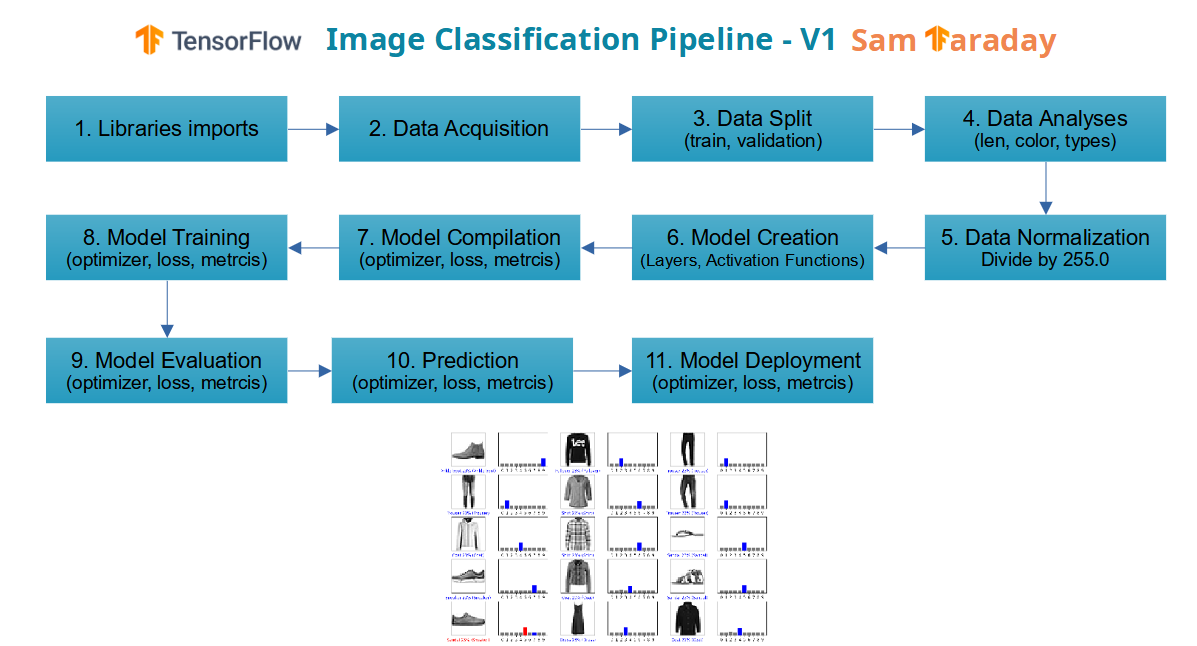

This notebook trains a neural network model to classify images of clothing, like sneakers and shirts.

**It is based on TensorFlow Basic Classification Guide, adapted by Sam Faraday**


# 1. Libraries Import 

## TensorFlow and tf.keras

In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.8.2


## Helper libraries

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

# 2. Data Acquisition

Import the Fashion MNIST dataset
This notebook uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

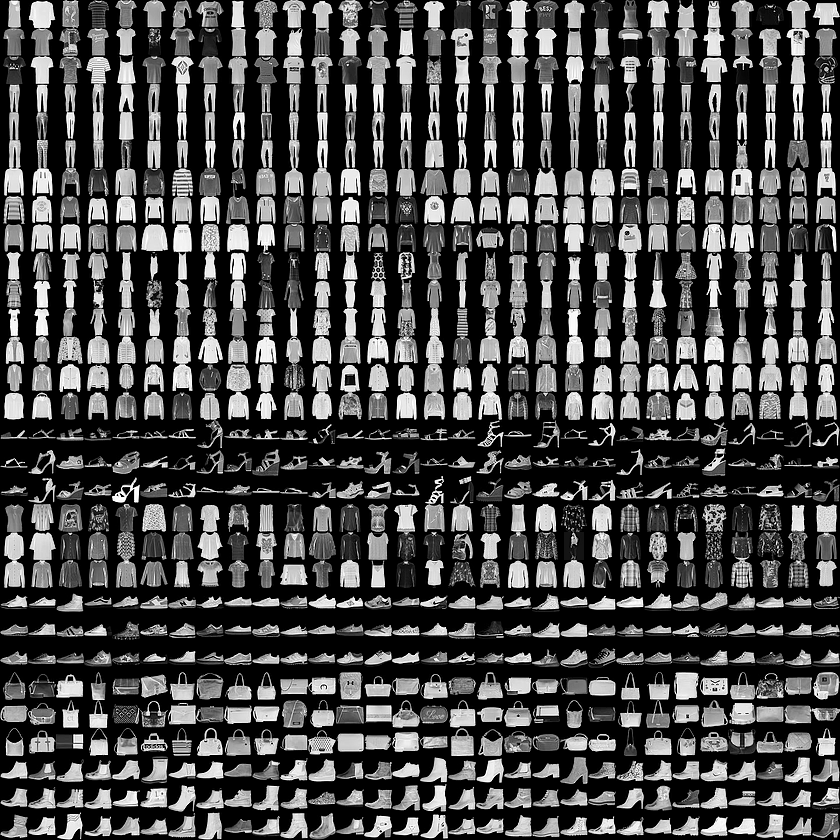

In [10]:
# instanciate da dataset
fmnist = keras.datasets.fashion_mnist

# 3. Data Split

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow.

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [ ]:
# Data Split
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# 4. Data Analyses

The Dataset contains 10 diffent Clothes Items:

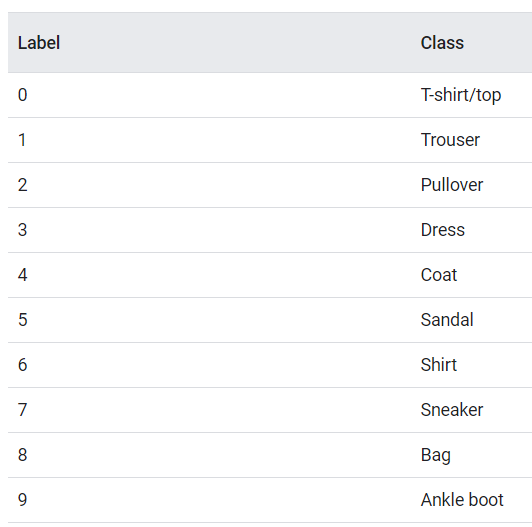

In [24]:
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
# Get the lenght of the training_images arrays
len(training_images)

60000

In [16]:
# Get the lenght of the training_labels arrays
len(training_labels)

60000

In [17]:
# Get the lenght of the test_images arrays
len(test_images)

10000

In [18]:
# Get the lenght of the training_labels arrays
len(test_labels)

10000

In [23]:
# Check the training_images array shape
# It has 60,000 images sized 28 x 28 - This informatio is used in the Flatten layer 
training_images.shape

(60000, 28, 28)

25


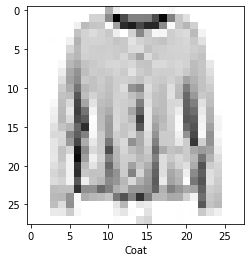

In [27]:
# Create a random variabe between 0 and 100 to analyse the images, then show one at a time 
my_random_item = np.random.randint(100)
plt.xlabel(class_names[test_labels[my_random_item]])
plt.imshow(test_images[my_random_item],cmap=plt.cm.binary)
print(my_random_item)

In [ ]:
# Check how the images are stored as an array of numbers
test_images[my_random_item]

# 6. Data Normalization

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

In [28]:
training_images = training_images / 255.0  # Normalize the pixel values of the train and test images
test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

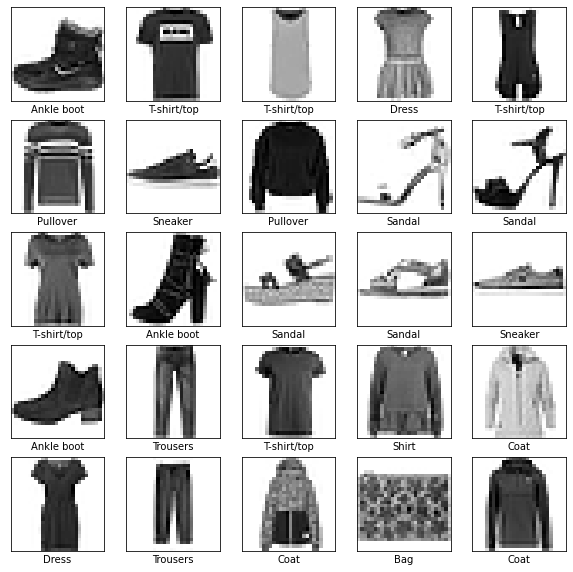

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

# 7. Model Creation

Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.


After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Finally, attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [34]:
my_model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                                    keras.layers.Dense(128, activation = 'relu'),
                                    keras.layers.Dense(10, activation="softmax")
    
])

# 6. Compile the Model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

**Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

**Optimizer** —This is how the model is updated based on the data it sees and its loss function.

**Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [35]:
my_model.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

# 7. Train / Fit the Model
fit means train (in Machine Learning)

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

The model learns to associate images and labels.

An **epoch** is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large).

You ask the model to make predictions about a test set—in this example, the test_images array.

Verify that the predictions match the labels from the test_labels array.
Feed the model.

To start training, call the model.fit method—so called because it "fits" the model to the training data:


In [36]:
my_model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5025 - accuracy: 0.8213
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3369 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

# 8. Evaluate the Model

Evaluate accuracy

Next, compare how the model performs on the test dataset

In [ ]:
my_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5642 - accuracy: 0.8145


[0.5641899108886719, 0.8144999742507935]

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

# 9. Make Prediction

With the model trained, you can use it to make predictions about some images

In [39]:
# hey, my_model, please predict those 10,000 images  in the test_images array
# then store the probability distribuition of each item in the my_classification variable)
my_classification = my_model.predict(test_images) 

In [40]:
type(my_classification)

numpy.ndarray

In [41]:
len(my_classification)

10000

In [61]:
# a probability distribuition from each of the 10 unique items
# it goes from 0 to 1
# Please note it uses scientific notation
# Generate a random item number from 0 to 100. You can change this limite
my_random_item = np.random.randint(100)

my_classification[my_random_item]

array([9.7005637e-10, 4.9636118e-11, 3.4449368e-10, 6.5445614e-11,
       2.8653580e-11, 2.2013530e-05, 7.1208359e-11, 6.2308796e-03,
       2.2617960e-11, 9.9374712e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value by using numpy.argmax funtions which returns the index of the maximum class item.

In [43]:
print(np.argmax(my_classification[0]))

9


88


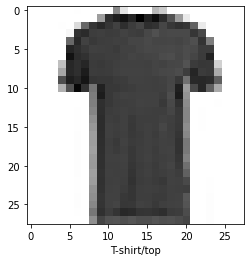

In [56]:
# Show  test images item
# Generate a random item number from 0 to 100. You can change this limite
my_random_item = np.random.randint(100)
# Show the item
plt.xlabel(class_names[test_labels[my_random_item]])
plt.imshow(test_images[my_random_item ], cmap=plt.cm.binary)
print(my_random_item)

In [67]:
# Check the test_images length
len(test_images)

10000

In [66]:
# Check the test_labels length
len(test_labels)

10000

In [68]:
# check the test_labels type
type(test_labels)

numpy.ndarray

In [73]:
# Check distinct / unique items by converting the test_labels to a set 
# A set, different from a list, will always show unique items
my_unique_items = set(test_labels)

In [74]:
# show them
my_unique_items

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [88]:
print("\n Classification \n :  ", my_classification[my_random_item], "\n \n Label:", 
      np.argmax(my_classification[my_random_item]),
      class_names[np.argmax(my_classification[my_random_item])])


 Classification 
 :   [9.7005637e-10 4.9636118e-11 3.4449368e-10 6.5445614e-11 2.8653580e-11
 2.2013530e-05 7.1208359e-11 6.2308796e-03 2.2617960e-11 9.9374712e-01] 
 
 Label: 9 Ankle boot
